## Importing and briefly exploring the data 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')

In [3]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [4]:
df.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

In [5]:
# check how many unique shops are there (100 - good! coincides with the task description)
df.shop_id.nunique()

100

In [6]:
# check how many unique users are there: the result means that users tend to make multiple orders
df.user_id.nunique()

301

In [7]:
# convert date of order placement to a datetime object 
df.created_at = pd.to_datetime(df.created_at)

In [8]:
# so, the dataset spans 30 days of March
df.created_at.describe()

count                    5000
unique                   4991
top       2017-03-28 04:00:00
freq                        3
first     2017-03-01 00:08:09
last      2017-03-30 23:55:35
Name: created_at, dtype: object

The brief exploration below shows that **AOV of \$3145.13 actually equals the mean over the *order_amount* column**. From these descriptive stats, we can see that the *order_amount* is skewed to the right: mean = 3145.128 while median (50%) = 284.00) due to existence of at least one huge outlier (704,000.00). In fact, this order amount may result from the large amount of items ordered: *total_items* data is also skewed to the right (mean = 116.32 while median = 3) due to at least one outlier (an order containing 2000 items).

In [9]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


## Plotting the data

### Order amount vs total items ordered
The plot below shows that there is, in fact, an outlier(s) in terms of the number of items ordered that results in a very large order value (2,000 items, 704,000.00 dollars, 352 dollars/item). 

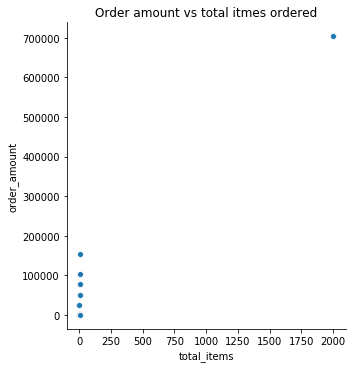

In [10]:
sns.relplot(x = 'total_items', y = 'order_amount', kind = 'scatter', data = df)
plt.title('Order amount vs total itmes ordered')
plt.show()

What happens when we exclude this outlier? Now some orders are really small, while others are above 20K dollars just for several items! This plot is not a good one since dots are overlaying each other (we's expect about 5000 data points on this plot) but it calls us to explore more orders with 20K+ value.

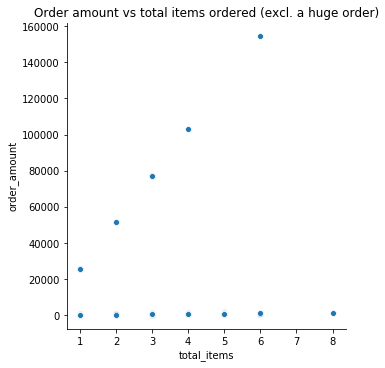

In [11]:
sns.relplot(x = 'total_items', y = 'order_amount', kind = 'scatter', data = df[df.total_items<2000])
plt.title('Order amount vs total items ordered (excl. a huge order)')
plt.show()

If we exclude large orders (above 20K in amount), the bulk of our data now produces a reasonable pattern of number of items ordered vs order_values. 

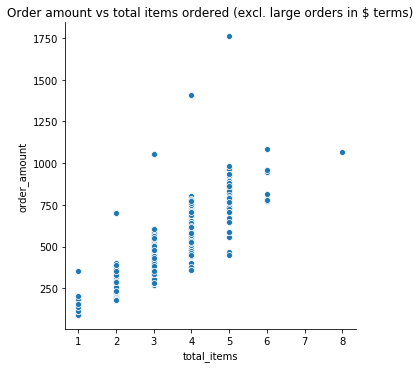

In [12]:
sns.relplot(x = 'total_items', y = 'order_amount', kind = 'scatter', data = df[df.order_amount<20000])
plt.title('Order amount vs total items ordered (excl. large orders in $ terms)')
plt.show()

### Distribution of items ordered

Let's look how the number of items ordered are distributed. Most orders contain up to 8 items, while 17 orders are for 2,000 items each. These are the orders that result in *order_value* of 704,000.00 dollars and are all between the same shop and client. **These 17 orders also account for 77% of all items sold and 76% of total money paid by clients over 30 days!**

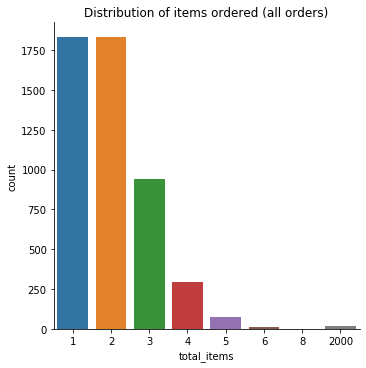

In [13]:
sns.catplot(x = 'total_items', kind = 'count', data = df)
plt.title('Distribution of items ordered (all orders)')
plt.show()

In [14]:
df.groupby('total_items')['order_id'].count()

total_items
1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
Name: order_id, dtype: int64

In [15]:
df[df.total_items==2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


In [16]:
# what share of total items sold belong to orders with 2,000 items?
df[df.total_items==2000].total_items.sum()/df.total_items.sum()

0.7738528769118718

In [17]:
# what share of all money paid by clients belongs to orders with 2,000 items?
df[df.total_items==2000].order_amount.sum()/df.order_amount.sum()

0.7610501067047192

### Distribution of order amounts

What about the distribution of order amounts? The bulk are below $2000, but **there are 63 orders of 25,000 dollars and up, which compose only 1.26% of all orders but are responsible for 90.5% of total order amounts!** Which, in turn, means that almost 99% of orders generate less than 10% of total order amounts...

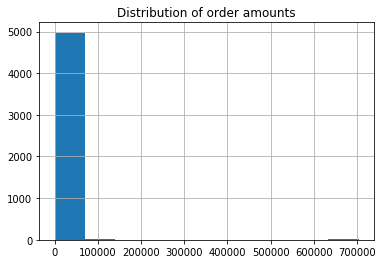

In [18]:
df.order_amount.hist()
plt.title('Distribution of order amounts')
plt.show()

In [19]:
# look what's in the tail of the distribution
df.groupby('order_amount')['order_id'].count().tail(10)

order_amount
1064       1
1086       1
1408       2
1760       1
25725     19
51450     16
77175      9
102900     1
154350     1
704000    17
Name: order_id, dtype: int64

In [20]:
# number of orders with above 25K in amount
(df.order_amount>25000).sum()

63

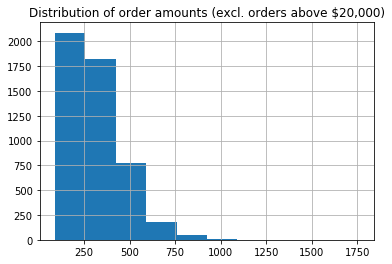

In [21]:
# how the bulk of orders are distributed
df[df.order_amount<20000].order_amount.hist()
plt.title('Distribution of order amounts (excl. orders above $20,000)')
plt.show()

In [22]:
# share of large orders in total order amounts
df[df.order_amount>25000].order_amount.sum()/df.order_amount.sum()

0.905006091961917

In [23]:
# number of large orders (in value and/or items)
len(df[df.order_amount>25000])/len(df)

0.0126

### Price per item

Given that each store sells only one shoe type (and thus each order may contain only multiple items of the same type), we can  explore how price per item is distributed. 

While most orders have price per item of 352 dollars and less (median=153 dollars), there are 46 orders where it equals 25,725 dollars (they all belong to one shop, shop_id=78). From the data available, it's impossible to guess whether these are some super-special shoes or they are just offered in packs of 100. This data point would need a further investigation (like checking this online store).

In [24]:
df['price_per_item'] = (df.order_amount/df.total_items)
df.price_per_item.describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: price_per_item, dtype: float64

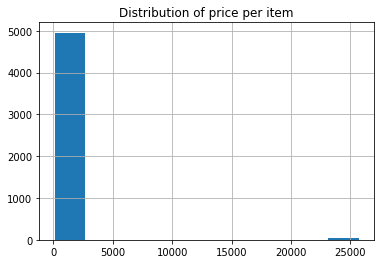

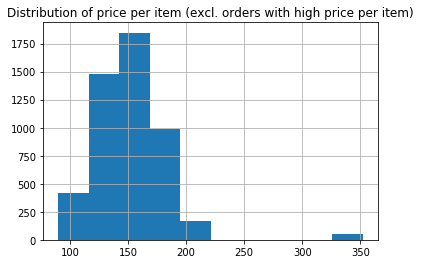

In [25]:
df.price_per_item.hist()
plt.title('Distribution of price per item')
plt.show()

# exclude orders with price per item above 20K
df[df.price_per_item<20000].price_per_item.hist()
plt.title('Distribution of price per item (excl. orders with high price per item)')
plt.show()

In [26]:
df.groupby('price_per_item')['order_id'].count().tail(10)

price_per_item
181.0      112
184.0       49
187.0      105
190.0       35
193.0       44
195.0       54
196.0       61
201.0       53
352.0       51
25725.0     46
Name: order_id, dtype: int64

In [27]:
df[df.price_per_item==25725.0]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 07:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:20,25725.0


In [28]:
# check whether ALL sales from the shop_id=78 have the same price - YES
df.price_per_item[df.shop_id==78].unique()

array([25725.])

In [29]:
# what share of total order amount belongs to orders with price per item above 20K?
df[df.price_per_item==25725.0].order_amount.sum()/df.order_amount.sum()

0.1439559852571978

## Considering new metrics to report

Depending on what exactly our analysis is aimed for, we can consider several other metrics to report.

### The median order amount

Median order amount would better describe **the bulk of orders (about 99% of all orders) by disregarding 'outliers'** - the orders with high price per item or high number of items. However, since these outliers account for above 90% of total order amounts and 77% of all items ordered, disregarding them is not the best approach.

In [30]:
df.order_amount.median()

284.0

### (Weighted) average order value per item

**This metric is better as it would account for our powerful outliers**: 

1. Orders with 2,000 items that account for 77% of all items sold would have proportionally higher weight than other orders when calculaing the average and thus would contribute more to it (and drag the average towards their price_per_item).
2. Orders with *price_per_item* above 25K would drag the average higher because they have simply **much** higher prices.

However, these outliers would not dominate this metric as much as they did in case of a simple mean of *order_amount*.

The simplest way to calculate this value would be to sum all order amounts over the 30 days and divide them by the total number of items ordered over the same period. This will show us how much, on average, a single ordered item costs, but taking into account the 'populairy' of the item. Products bough more often/in higher quantities will drag this average value up or down depending on whether they are more expensive or cheaper vs the bulk of all products. 

In [31]:
# calculate weighted average order value per item
df.order_amount.sum()/df.total_items.sum()

357.92152221412965

In [32]:
# another way to calculate the same value
(df.price_per_item*df.total_items).sum() / df.total_items.sum()

357.92152221412965

Notice that the above value is different from a simple mean of *price_per_item* (below). With the simple mean, all orders are given the same weight of 1 when we calculate the mean. 

In [33]:
df.price_per_item.mean()

387.7428

### How the weighted average would change if...

A brief exploration of how our outliers impact the weighted average value per item

In [34]:
# what if we exclude orders with price_per_item over 25K?
f1 = df.price_per_item<25000
df[f1==True].order_amount.sum()/df[f1==True].total_items.sum()

307.01149425287355

In [35]:
# what if we exclude orders with total items ordered=2K?
f2 = df.total_items<2000
df[f2==True].order_amount.sum()/df[f2==True].total_items.sum()

378.1843800322061

In [36]:
# what if we exclude both?
f3 = (df.order_amount<20000) 
df[f3==True].order_amount.sum()/df[f3==True].total_items.sum()

151.68968318440292

In [37]:
# what if we KEEP only outliers?
df[f3==False].order_amount.sum()/df[f3==False].total_items.sum()

417.50176015019946

In [38]:
# what if it's not 25K per item but per 100 items? our denominator grows while the numerator is the same -> reduction in weighted average
items_old = df.total_items[f1==False].sum()
items_new = items_old*100
df.order_amount.sum()/(df.total_items.sum() - items_old + items_new)

298.6939674821456